In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math

In [2]:
TRAIN_DATA_DIR = './cats_and_dogs_small/train'
VALIDATION_DATA_DIR = './cats_and_dogs_small/validation'
TEST_DATA_DIR = './cats_and_dogs_small/test'

TRAIN_SAMPLES = 800*2
VALIDATION_SAMPLES = 400*2
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   vertical_flip=True)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size=(IMG_WIDTH,
                                                                 IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 1600 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
def model_maker():
    base_model = MobileNet(include_top=False,
                           input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

    for layer in base_model.layers[:-2]:
        layer.trainable = False # Top 층을 제외한 나머지 층에서 2개의 층을 새롭게 학습 

    input1 = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input1)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    return Model(inputs=input1, outputs=predictions)

In [6]:
model = model_maker()

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])
history=model.fit(
    train_generator,
    steps_per_epoch=math.ceil(float(TRAIN_SAMPLES) / BATCH_SIZE),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=math.ceil(float(VALIDATION_SAMPLES) / BATCH_SIZE))

Epoch 1/10
25/25 [==============================] - 20s 814ms/step - loss: 0.4259 - acc: 0.8000 - val_loss: 0.0924 - val_acc: 0.9762
Epoch 2/10
25/25 [==============================] - 18s 712ms/step - loss: 0.2489 - acc: 0.9013 - val_loss: 0.0721 - val_acc: 0.9800
Epoch 3/10
25/25 [==============================] - 17s 692ms/step - loss: 0.2065 - acc: 0.9187 - val_loss: 0.0687 - val_acc: 0.9825
Epoch 4/10
25/25 [==============================] - 17s 688ms/step - loss: 0.1846 - acc: 0.9187 - val_loss: 0.0563 - val_acc: 0.9875
Epoch 5/10
25/25 [==============================] - 17s 687ms/step - loss: 0.1755 - acc: 0.9287 - val_loss: 0.0599 - val_acc: 0.9762
Epoch 6/10
25/25 [==============================] - 17s 691ms/step - loss: 0.1638 - acc: 0.9375 - val_loss: 0.0481 - val_acc: 0.9887
Epoch 7/10
25/25 [==============================] - 17s 696ms/step - loss: 0.1612 - acc: 0.9406 - val_loss: 0.0425 - val_acc: 0.9875
Epoch 8/10
25/25 [==============================] - 16s 640ms/step - 

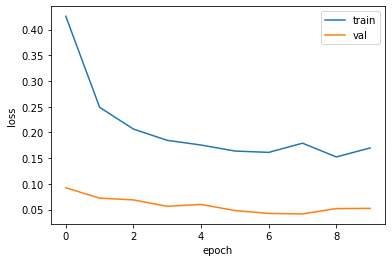

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
test_generator = val_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 800 images belonging to 2 classes.


In [10]:
model.evaluate_generator(test_generator, steps=math.ceil(float(800 / BATCH_SIZE)),verbose=1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
13/13 [==============================] - 2s 173ms/step - loss: 0.0407 - acc: 0.9837


[0.04065251722931862, 0.9837499856948853]

In [37]:
np.set_printoptions(suppress=True)

In [38]:
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255.  # Preprocess the image
prediction = model.predict(preprocessed_img)
print(np.array(prediction[0]))
# print(validation_generator.class_indices)

[0.9999156  0.00008441]


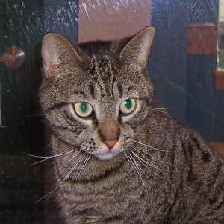

In [39]:
img